In [187]:
import os
import numpy as np  
import pandas as pd
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
ratings_data = pd.read_csv("ratings_Electronics.csv",header=None)  


In [142]:
ratings_data.columns = ['userId', 'productId', 'ratings','timestamp']

In [146]:
ratings_data = ratings_data.sample(int(ratings_data.shape[0]/10))

In [147]:
ratings_data.shape

(782448, 4)

In [185]:
ratings_data.isnull().any()

userId       False
productId    False
ratings      False
timestamp    False
dtype: bool

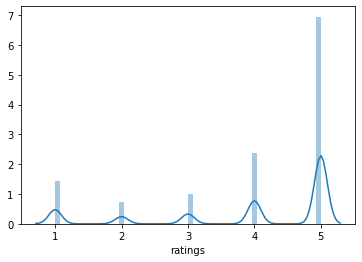

In [189]:
sns.distplot(ratings_data["ratings"], kde=True)

In [148]:
ratings_data.head()

,userId,productId,ratings,timestamp
5644026,A3F52SVA9D8F7F,B0076O7VS2,5.0,1401235200
5059752,ALQY64U2VV932,B005L9ZZ32,4.0,1391212800
396818,A39B2YH3SSRGJ4,B0001HKIJK,5.0,1246838400
3665483,A25KR9JWY7OKZB,B003XT9SXU,4.0,1320451200
3011536,A31T2EXSZ43J6Y,B00321KGNK,4.0,1266537600


In [149]:
ratings_data_new = ratings_data.drop(['timestamp'], axis=1)

In [150]:
ratings_data_new.head()

,userId,productId,ratings
5644026,A3F52SVA9D8F7F,B0076O7VS2,5.0
5059752,ALQY64U2VV932,B005L9ZZ32,4.0
396818,A39B2YH3SSRGJ4,B0001HKIJK,5.0
3665483,A25KR9JWY7OKZB,B003XT9SXU,4.0
3011536,A31T2EXSZ43J6Y,B00321KGNK,4.0


from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ratings_data_new, test_size = 0.30, random_state=0)
print(train_data.head(5))

In [151]:
ratings_data_new.groupby('productId')['ratings'].mean().head()  

productId
0439886341    1.0
0511189877    5.0
0528881469    3.5
0594033896    5.0
0594033926    5.0
Name: ratings, dtype: float64

In [152]:
ratings_data_new.groupby('productId')['ratings'].mean().sort_values(ascending=False).head() 

productId
BT008UKTMW    5.0
B0001B86HC    5.0
B001MS2UK2    5.0
B006I6FXEI    5.0
B001MS2RUA    5.0
Name: ratings, dtype: float64

In [153]:
#Let's now plot the total number of ratings for a movie
ratings_data_new.groupby('productId')['ratings'].count().sort_values(ascending=False).head()  

productId
B0074BW614    1787
B00DR0PDNE    1693
B007WTAJTO    1334
B006GWO5WK    1194
B0019EHU8G    1190
Name: ratings, dtype: int64

In [156]:
new =  pd.DataFrame(ratings_data_new.groupby('productId')['ratings'].count())
new

,ratings
productId,
0439886341,1
0511189877,1
0528881469,4
0594033896,1
0594033926,2
0594451647,1
0594481813,5
0594549558,1
089933623X,1


In [157]:
#consider only the products who have been rated more than 50 times
rslt_df = new[new['ratings'] > 50] 
rslt_df

,ratings
productId,
0972683275,96
B00001P4ZH,200
B00001WRSJ,168
B00004SABB,90
B00004SB92,95
B00004T8R2,167
B00004THCZ,87
B00004WCGF,80
B00004WCID,52


In [160]:
#from the main dataframe consider only users who have rated products more than 50
df1 = ratings_data_new[ratings_data_new.productId.isin(rslt_df.index)]
df1.shape
df1

,userId,productId,ratings
5120255,AFEJ85EXY0UW6,B005ONMDYE,3.0
6970544,A31G2F8FDQY3V4,B00AWKC0JM,5.0
2009076,AKQ3F81Z2IR9D,B001FA1O0O,5.0
7231724,A3LVV98D4MQHAO,B00CAFPF26,5.0
1208759,A1KET67IBJU97T,B000NK3H4S,3.0
102541,A250AXLRBVYKB4,B00005LEN4,5.0
1369138,A32AR2CLW1JLE1,B000TG4BA0,1.0
3304331,A2B8XYBTCIH93Y,B003ELYQGG,5.0
2237506,A2JL2YZMVMXXFC,B001QFZMCO,5.0
3904560,A151HPU4WQHMZG,B00466X9SY,4.0


In [161]:
#Execute the following script to create ratings_mean_count dataframe and first add the average rating of each productid to this dataframe:
ratings_mean_count = pd.DataFrame(ratings_data_new.groupby('productId')['ratings'].mean()) 

In [162]:
ratings_mean_count

,ratings
productId,
0439886341,1.000000
0511189877,5.000000
0528881469,3.500000
0594033896,5.000000
0594033926,5.000000
0594451647,5.000000
0594481813,3.000000
0594549558,5.000000
089933623X,1.000000


In [163]:
#we need to add the number of ratings for a productid to the ratings_mean_count dataframe.
ratings_mean_count['rating_counts'] = pd.DataFrame(ratings_data_new.groupby('productId')['ratings'].count()) 


In [164]:
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0439886341,1.0,1
0511189877,5.0,1
0528881469,3.5,4
0594033896,5.0,1
0594033926,5.0,2


In [165]:
ratings_mean_count.columns 

Index(['ratings', 'rating_counts'], dtype='object')

In [166]:
#You can see productid , along with the average rating and number of ratings for the movie.
ratings_mean_count.sort_values(by='rating_counts', ascending=False)

,ratings,rating_counts
productId,,
B0074BW614,4.518747,1787
B00DR0PDNE,3.925576,1693
B007WTAJTO,4.419790,1334
B006GWO5WK,4.261307,1194
B0019EHU8G,4.751261,1190
B003ELYQGG,4.362129,1146
B003ES5ZUU,4.694553,1028
B007R5YDYA,4.687117,978
B0002L5R78,4.419255,966


In [167]:
ratings_mean_count.shape

(166908, 2)

In [168]:
ratings_data_new

,userId,productId,ratings
5644026,A3F52SVA9D8F7F,B0076O7VS2,5.0
5059752,ALQY64U2VV932,B005L9ZZ32,4.0
396818,A39B2YH3SSRGJ4,B0001HKIJK,5.0
3665483,A25KR9JWY7OKZB,B003XT9SXU,4.0
3011536,A31T2EXSZ43J6Y,B00321KGNK,4.0
5120255,AFEJ85EXY0UW6,B005ONMDYE,3.0
6970544,A31G2F8FDQY3V4,B00AWKC0JM,5.0
3208514,A2TUJGVTV7WCNP,B003BRUS3S,5.0
2009076,AKQ3F81Z2IR9D,B001FA1O0O,5.0
3192917,A2CWKZ1UDLTFU9,B003B2N9CA,5.0


In [169]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [170]:
df1

,userId,productId,ratings
5120255,AFEJ85EXY0UW6,B005ONMDYE,3.0
6970544,A31G2F8FDQY3V4,B00AWKC0JM,5.0
2009076,AKQ3F81Z2IR9D,B001FA1O0O,5.0
7231724,A3LVV98D4MQHAO,B00CAFPF26,5.0
1208759,A1KET67IBJU97T,B000NK3H4S,3.0
102541,A250AXLRBVYKB4,B00005LEN4,5.0
1369138,A32AR2CLW1JLE1,B000TG4BA0,1.0
3304331,A2B8XYBTCIH93Y,B003ELYQGG,5.0
2237506,A2JL2YZMVMXXFC,B001QFZMCO,5.0
3904560,A151HPU4WQHMZG,B00466X9SY,4.0


In [171]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'productId', 'ratings']], reader)

trainset, testset = train_test_split(data, test_size=.15)

In [172]:
trainset

In [173]:
ratings_data_new.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [174]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [175]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [176]:
test_pred

[Prediction(uid='A3QOZQ2SARTU06', iid='B001U3ZH7W', r_ui=4.0, est=4.173646124367085, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A28IEW6CJFMQ9R', iid='B004RKQM8I', r_ui=4.0, est=4.173646124367085, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1B4YMLHZA4CRK', iid='B001EYV9TM', r_ui=4.0, est=4.173646124367085, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3BIPR7H9KJIUI', iid='B003C1FC7K', r_ui=5.0, est=4.173646124367085, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3IP2HTXWGXY8N', iid='B00825BZUY', r_ui=5.0, est=4.173646124367085, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2HY6GEQHNUYHU', iid='B005CLPP8E', r_ui=5.0, est=4.173646124367085, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A28CWG7QYV5GYZ', 

In [177]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.2835


1.283528309121736

In [182]:
df = pd.DataFrame(test_pred, columns=['userId', 'productId', 'ratings', 'est', 'details'])
best_predictions = df.sort_values(by='ratings', ascending=False)

In [183]:
best_predictions.head()

,userId,productId,ratings,est,details
16485,A1LESMGKXUXMX5,B004GCJEZU,5.0,4.173646,"{'was_impossible': True, 'reason': 'User and/o..."
14439,A1Z12Q7EY6DHNX,B001ELK2NY,5.0,4.173646,"{'was_impossible': True, 'reason': 'User and/o..."
14437,A9DJZWVAKV28B,B005CLPP84,5.0,4.173646,"{'was_impossible': True, 'reason': 'User and/o..."
25862,A31ZEAD4HT0CPI,B003NR57BY,5.0,4.173646,"{'was_impossible': True, 'reason': 'User and/o..."
14434,A360RRDLA8DWGU,B003NREDG4,5.0,4.173646,"{'was_impossible': True, 'reason': 'User and/o..."


In [184]:
ratings_mean_count.sort_values(by='rating_counts', ascending=False).head()

,ratings,rating_counts
productId,,
B0074BW614,4.518747,1787
B00DR0PDNE,3.925576,1693
B007WTAJTO,4.419790,1334
B006GWO5WK,4.261307,1194
B0019EHU8G,4.751261,1190


When the user does not have defined set of pattern of ratings, then Colab filter Based Recommondetion System is good choice. But where we recommend user , based of popularity then it might not be fit with user's perceptions.